In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import os
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available  0


IndexError: list index out of range

In [144]:
def get_images(subset):
    images_dir = '../../datasets/brain_tumors'

    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

    batch_size = 32
    img_height = 128
    img_width = 128

    dataset = datagen.flow_from_directory(
    images_dir, 
    target_size=(img_height, img_width), # Changes the size
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True, # Normal = True
    subset=subset
    )

    return dataset

In [145]:
train_data = get_images('training')
val_data = get_images('validation')

Found 2169 images belonging to 4 classes.
Found 927 images belonging to 4 classes.


In [143]:
train_data.class_indices, val_data.class_indices

({'glioma_tumor': 0, 'meningioma_tumor': 1, 'normal': 2, 'pituitary_tumor': 3},
 {'glioma_tumor': 0, 'meningioma_tumor': 1, 'normal': 2, 'pituitary_tumor': 3})

In [146]:
imgs, labels = next(train_data)
classes = list(train_data.class_indices.keys())

<function matplotlib.pyplot.show(close=None, block=None)>

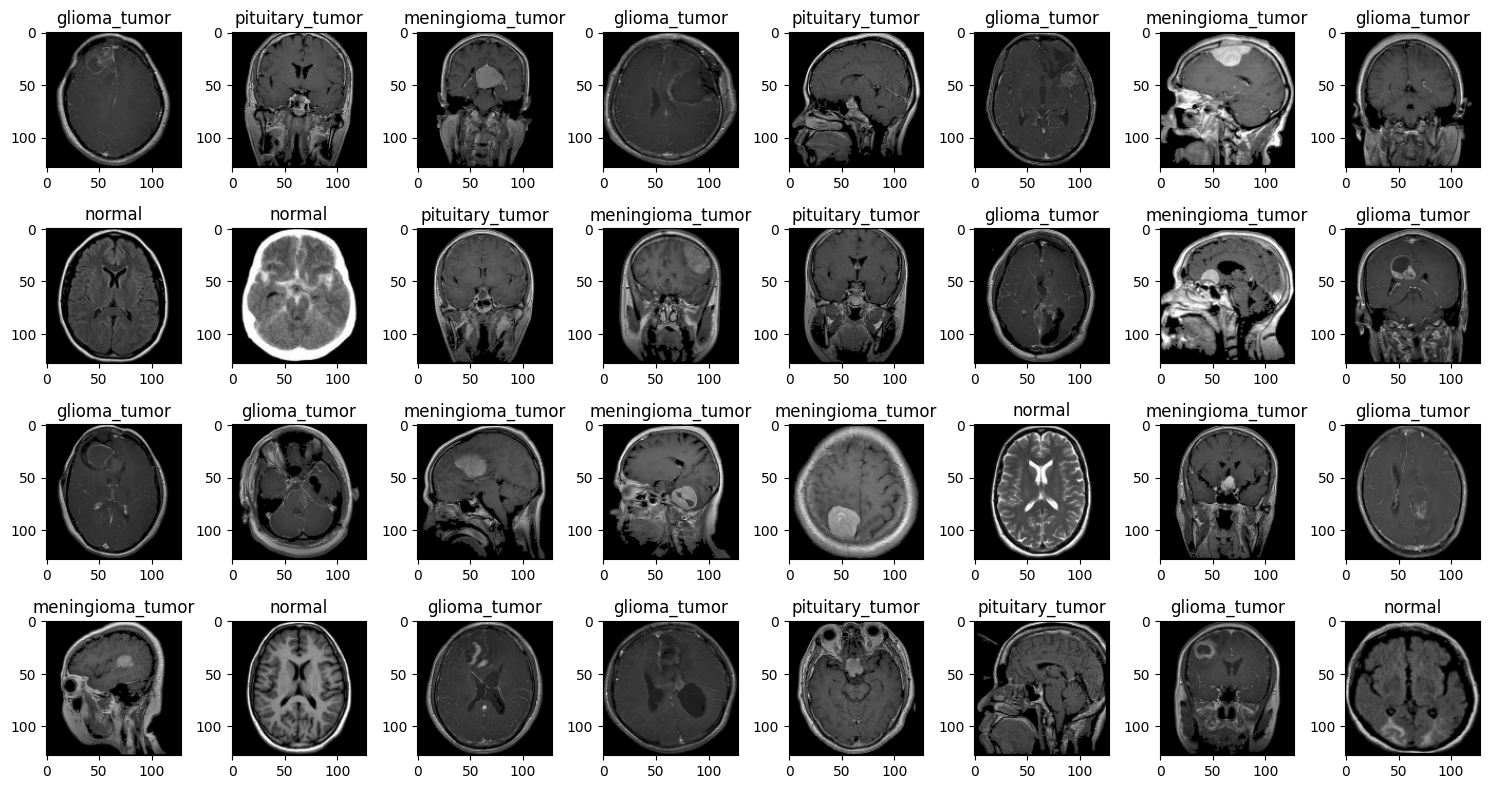

In [147]:
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(15, 8))
i, j = 0, 0
for img, label in zip(imgs, labels):
    ax = axes[i, j]
    ax.imshow(img)
    index = list(label).index(1)
    clss = classes[index]
    ax.set_title(clss) 
    j = j + 1 if i >= 3 else j
    i = i + 1 if i < 3 else 0

plt.tight_layout()
plt.show

In [153]:
model = Sequential([
    Conv2D(input_shape=(128, 128, 3), filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dense(units=4, activation='softmax')
])

In [155]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 64)       

In [156]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [157]:
model.fit(x=train_data, validation_data=val_data, epochs=10, verbose=2, batch_size=32)

Epoch 1/10
68/68 - 21s - loss: 1.2202 - accuracy: 0.4592 - val_loss: 1.1501 - val_accuracy: 0.5566 - 21s/epoch - 305ms/step
Epoch 2/10
68/68 - 19s - loss: 0.8270 - accuracy: 0.6621 - val_loss: 0.9648 - val_accuracy: 0.6246 - 19s/epoch - 285ms/step
Epoch 3/10
68/68 - 19s - loss: 0.5300 - accuracy: 0.8082 - val_loss: 0.9664 - val_accuracy: 0.6009 - 19s/epoch - 281ms/step
Epoch 4/10
68/68 - 19s - loss: 0.3294 - accuracy: 0.8783 - val_loss: 1.1902 - val_accuracy: 0.6235 - 19s/epoch - 283ms/step
Epoch 5/10
68/68 - 19s - loss: 0.2598 - accuracy: 0.9110 - val_loss: 0.8787 - val_accuracy: 0.7087 - 19s/epoch - 281ms/step
Epoch 6/10
68/68 - 19s - loss: 0.1307 - accuracy: 0.9599 - val_loss: 0.9395 - val_accuracy: 0.7184 - 19s/epoch - 281ms/step
Epoch 7/10
68/68 - 19s - loss: 0.0761 - accuracy: 0.9774 - val_loss: 1.1412 - val_accuracy: 0.7238 - 19s/epoch - 284ms/step
Epoch 8/10
68/68 - 19s - loss: 0.0406 - accuracy: 0.9899 - val_loss: 1.2487 - val_accuracy: 0.7077 - 19s/epoch - 274ms/step
Epoch 9/